# TCC PUC MINAS

# PÓS GRADUAÇÃO EM CIÊNCIA DE DADOS E BIG DATA 2020-2021


## Predição de uma Partida de Futebol com Machine Learning
### Vinicius Mattedi de Souza



# Imports

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Data Preparation

In [2]:
dCampBrasil = pd.read_csv('D:/Pós Graduação - PUC MG/TCC/campeonato-brasileiro.csv', header = 0, sep = ';')

In [3]:
dCampBrasil.head()

,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante_Placar,Visitante_Placar,Estado_Mandante,Estado_Visitante,Estado_Vencedor
0,1,1,2000-07-29,16h00,Sábado,Fluminense,Bahia,Fluminense,Maracanã,2.0,0.0,RJ,BA,RJ
1,2,1,2000-07-29,16h00,Sábado,Vasco,Sport,Sport,São Januário,0.0,2.0,RJ,PE,PE
2,3,1,2000-07-29,16h00,Sábado,Vitória,Palmeiras,Vitória,Barradão,4.0,1.0,ES,SP,ES
3,4,1,2000-07-30,17h00,Domingo,Botafogo-RJ,Atlético-MG,-,Caio Martins,0.0,0.0,RJ,MG,-
4,5,1,2000-07-30,18h30,Domingo,Juventude,Flamengo,-,Alfredo Jaconi,1.0,1.0,RS,RJ,-


In [4]:
dEstatistic = pd.read_csv('D:/Pós Graduação - PUC MG/TCC/campeonato-brasileiro-estatisticas.csv', header = 0, sep = ';')

In [5]:
dEstatistic.head()

,ID,M_Chutes,M_ChutesGol,M_Posse de bola,M_Faltas,M_Cartoes amarelos,M_Cartoes vermelhos,M_Impedimentos,M_Escanteios,V_Chutes,V_ChutesGol,V_Posse de bola,V_Faltas,V_Cartoes amarelos,V_Cartoes vermelhos,V_Impedimentos,V_Escanteios
0,6040,17.0,0.0,50%,20.0,2.0,0.0,2.0,11.0,10.0,0.0,50%,14.0,4.0,0.0,4.0,2.0
1,6041,13.0,0.0,45%,20.0,2.0,0.0,3.0,3.0,16.0,0.0,55%,21.0,2.0,0.0,0.0,5.0
2,6042,26.0,11.0,74%,9.0,2.0,0.0,1.0,5.0,3.0,0.0,26%,14.0,0.0,1.0,1.0,3.0
3,6043,11.0,0.0,62%,16.0,3.0,0.0,0.0,4.0,5.0,0.0,38%,27.0,5.0,0.0,2.0,2.0
4,6044,11.0,0.0,45%,17.0,3.0,0.0,2.0,5.0,17.0,0.0,55%,21.0,4.0,1.0,0.0,10.0


In [6]:
Dados = pd.merge(dCampBrasil, dEstatistic, on = 'ID', how = 'inner')

In [7]:
Dados.set_index(['ID'])
Dados.head()

,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante_Placar,...,M_Impedimentos,M_Escanteios,V_Chutes,V_ChutesGol,V_Posse de bola,V_Faltas,V_Cartoes amarelos,V_Cartoes vermelhos,V_Impedimentos,V_Escanteios
0,6040,1,2015-05-09,18h30,Sábado,Palmeiras,Atlético-MG,-,Allianz Parque,2.0,...,2.0,11.0,10.0,0.0,50%,14.0,4.0,0.0,4.0,2.0
1,6041,1,2015-05-09,18h30,Sábado,Chapecoense,Coritiba,Chapecoense,Arena Condá,2.0,...,3.0,3.0,16.0,0.0,55%,21.0,2.0,0.0,0.0,5.0
2,6042,1,2015-05-09,21h00,Sábado,Fluminense,Joinville,Fluminense,Maracanã,1.0,...,1.0,5.0,3.0,0.0,26%,14.0,0.0,1.0,1.0,3.0
3,6043,1,2015-05-10,18h30,Domingo,Vasco,Goiás,-,São Januário,0.0,...,0.0,4.0,5.0,0.0,38%,27.0,5.0,0.0,2.0,2.0
4,6044,1,2015-05-10,11h00,Domingo,Grêmio,Ponte Preta,-,Arena do Grêmio,3.0,...,2.0,5.0,17.0,0.0,55%,21.0,4.0,1.0,0.0,10.0


In [8]:
Dados.shape

(2403, 30)

In [9]:
Partidas= len(Dados)
print('Quantidade de Partidas: ' + str(Partidas) + ' (nº de linhas do dataset)')
print(' ')
Clubes = Dados['Mandante'].tolist()
print('Lista de Clubes: {}'.format(sorted(set(Clubes))))
print(' ')
Clubes = sorted(set([x.upper() for x in Clubes]))
print ('Lista de Clubes Corrigida: {}'.format(Clubes))
print ('Quantidade de Clubes: ' + str(len(Clubes)))
print(' ')
Estados = Dados['Estado_Mandante'].tolist() + Dados['Estado_Visitante'].tolist()
print('Lista de Estados: {}'.format(sorted(set(Estados))))
print(' ')
Mengao = (len(Dados[Dados.Vencedor == 'Flamengo'])) + (len(Dados[Dados.Vencedor == 'flamengo']))
PercMengao = round(((Mengao/((len(Dados[Dados.Mandante == 'Flamengo']))+(len(Dados[Dados.Visitante == 'Flamengo']))))*100),0)
print('Nº de vezes que o Flamengo ganhou: ' + str(Mengao) + ', (' + str(PercMengao) +' % dos confrontos)')
print(' ')
VMandante = len(Dados[Dados.Vencedor == Dados.Mandante])
print('Nº de Vitória dos Mandantes: ' + str(VMandante))
Empate = len(Dados[Dados.Vencedor == '-'])
print('Jogos empatados :' + str(Empate))
Vvisitante = len(Dados[Dados.Vencedor == Dados.Visitante])
print('Nº de Vitória dos Visitantes: ' + str(Vvisitante))
Perc_VMandante = round((VMandante/Partidas)*100,0)
print('Percentual de Vitória dos Mandantes: ' + str(Perc_VMandante) + ' %')
Media_Gol_Mandante = round(Dados.Mandante_Placar.mean(),2)
print('Média de gols dos times mandantes: ' + str(Media_Gol_Mandante))
Media_Gol_Visitante = round(Dados.Visitante_Placar.mean(),2)
print('Média de gols dos times visitantes: ' + str(Media_Gol_Visitante))

Quantidade de Partidas: 2403 (nº de linhas do dataset)
 
Lista de Clubes: ['América-MG', 'Athlético-PR', 'Atlético-GO', 'Atlético-MG', 'Avaí', 'Bahia', 'Botafogo-RJ', 'Botafogo-rj', 'Bragantino', 'CSA', 'Ceará', 'Chapecoense', 'Corinthians', 'Coritiba', 'Cruzeiro', 'Figueirense', 'Flamengo', 'Fluminense', 'Fortaleza', 'Goiás', 'Grêmio', 'Internacional', 'Joinville', 'Palmeiras', 'Paraná', 'Ponte Preta', 'Santa Cruz', 'Santos', 'Sport', 'São Paulo', 'VASCO', 'Vasco', 'Vitória', 'américa-mg', 'athlético-pr', 'atlético-go', 'atlético-mg', 'bahia', 'bragantino', 'ceará', 'chapecoense', 'corinthians', 'cuiabá', 'flamengo', 'fluminense', 'fortaleza', 'grêmio', 'internacional', 'juventude', 'palmeiras', 'santos', 'sport', 'são paulo']
 
Lista de Clubes Corrigida: ['AMÉRICA-MG', 'ATHLÉTICO-PR', 'ATLÉTICO-GO', 'ATLÉTICO-MG', 'AVAÍ', 'BAHIA', 'BOTAFOGO-RJ', 'BRAGANTINO', 'CEARÁ', 'CHAPECOENSE', 'CORINTHIANS', 'CORITIBA', 'CRUZEIRO', 'CSA', 'CUIABÁ', 'FIGUEIRENSE', 'FLAMENGO', 'FLUMINENSE', 'FORT

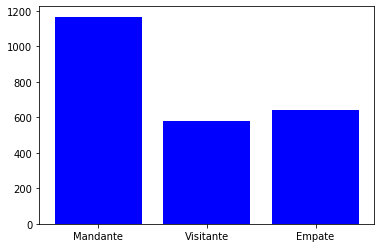

In [10]:
x = np.arange(3)
plt.bar(x, [VMandante, Vvisitante, Empate],color= 'blue')
plt.xticks(x, ('Mandante', 'Visitante', 'Empate'))
plt.show()

In [11]:
Dados['Mandante'] = Dados['Mandante'].str.upper()
Dados['Visitante'] = Dados['Visitante'].str.upper()
Dados['Vencedor'] = Dados['Vencedor'].str.upper()
def mudar_nome_vencedor(row):
    if (row['Vencedor'] == row['Visitante']):
        return 0
    elif (row['Vencedor'] == row['Mandante']):
        return 1
    else:
        return 2
Dados['Vencedor'] = Dados.apply(mudar_nome_vencedor, axis=1)

In [12]:
print(Dados[['Mandante_Placar', 'Visitante_Placar', 'M_Chutes', 'M_ChutesGol', 'V_Chutes', 'V_ChutesGol', 'M_Posse de bola', 'V_Posse de bola']])

      Mandante_Placar  Visitante_Placar  M_Chutes  M_ChutesGol  V_Chutes  \
0                 2.0               2.0      17.0          0.0      10.0   
1                 2.0               1.0      13.0          0.0      16.0   
2                 1.0               0.0      26.0         11.0       3.0   
3                 0.0               0.0      11.0          0.0       5.0   
4                 3.0               3.0      11.0          0.0      17.0   
...               ...               ...       ...          ...       ...   
2398              0.0               3.0      11.0          1.0      15.0   
2399              0.0               5.0      11.0          3.0      16.0   
2400              1.0               0.0      14.0          5.0      11.0   
2401              2.0               2.0      11.0          5.0      16.0   
2402              0.0               1.0      16.0          3.0      11.0   

      V_ChutesGol M_Posse de bola V_Posse de bola  
0             0.0             50%  

In [13]:
Dados['M_Posse de bola'] = Dados['M_Posse de bola'].str.replace('%','')
Dados['M_Posse de bola'] = pd.to_numeric(Dados['M_Posse de bola'],errors = 'coerce')
Dados['M_Posse de bola'] = Dados['M_Posse de bola'] / 100

Dados['V_Posse de bola'] = Dados['V_Posse de bola'].str.replace('%','')
Dados['V_Posse de bola'] = pd.to_numeric(Dados['V_Posse de bola'],errors = 'coerce')
Dados['V_Posse de bola'] = Dados['V_Posse de bola'] / 100

In [14]:
print(len(Dados.loc[(Dados.M_ChutesGol== 0) & (Dados.M_Chutes>2) & (Dados.Mandante_Placar!=0)]))
print(len(Dados.loc[(Dados.V_ChutesGol== 0) & (Dados.V_Chutes>2) & (Dados.Visitante_Placar!=0)]))

560
429


In [15]:
M_chutes_gol_estim = round((Dados['M_Chutes'] / 3),0)
Dados.loc[Dados['M_ChutesGol']== 0, 'M_ChutesGol'] = M_chutes_gol_estim  

V_chutes_gol_estim = round((Dados['V_Chutes'] / 3),0)
Dados.loc[Dados['V_ChutesGol']== 0, 'V_ChutesGol'] = V_chutes_gol_estim  

In [16]:
Dados.isnull().sum()

ID                      0
Rodada                  0
Data                    0
Horário                10
Dia                     0
Mandante                0
Visitante               0
Vencedor                0
Arena                   0
Mandante_Placar         0
Visitante_Placar        0
Estado_Mandante         0
Estado_Visitante        0
Estado_Vencedor         0
M_Chutes               26
M_ChutesGol            26
M_Posse de bola        26
M_Faltas               26
M_Cartoes amarelos     26
M_Cartoes vermelhos    26
M_Impedimentos         26
M_Escanteios           26
V_Chutes               26
V_ChutesGol            26
V_Posse de bola        26
V_Faltas               26
V_Cartoes amarelos     26
V_Cartoes vermelhos    26
V_Impedimentos         26
V_Escanteios           26
dtype: int64

In [17]:
Dados = Dados.dropna(axis=0)

In [18]:
Dados.shape

(2367, 30)

# Data Exploration

In [19]:
Atributos = Dados.drop(['Data', 'Horário', 'Dia','Arena', 'Rodada','Vencedor','Estado_Mandante','Estado_Visitante', 'Estado_Vencedor', 'Mandante', 'Visitante', 'ID'], axis =1)
Result = Dados['Vencedor'].copy()

In [20]:
Atributos.describe

<bound method NDFrame.describe of       Mandante_Placar  Visitante_Placar  M_Chutes  M_ChutesGol  \
0                 2.0               2.0      17.0          6.0   
1                 2.0               1.0      13.0          4.0   
2                 1.0               0.0      26.0         11.0   
3                 0.0               0.0      11.0          4.0   
4                 3.0               3.0      11.0          4.0   
...               ...               ...       ...          ...   
2398              0.0               3.0      11.0          1.0   
2399              0.0               5.0      11.0          3.0   
2400              1.0               0.0      14.0          5.0   
2401              2.0               2.0      11.0          5.0   
2402              0.0               1.0      16.0          3.0   

      M_Posse de bola  M_Faltas  M_Cartoes amarelos  M_Cartoes vermelhos  \
0                0.50      20.0                 2.0                  0.0   
1                0.45

In [21]:
Atributos.dtypes

Mandante_Placar        float64
Visitante_Placar       float64
M_Chutes               float64
M_ChutesGol            float64
M_Posse de bola        float64
M_Faltas               float64
M_Cartoes amarelos     float64
M_Cartoes vermelhos    float64
M_Impedimentos         float64
M_Escanteios           float64
V_Chutes               float64
V_ChutesGol            float64
V_Posse de bola        float64
V_Faltas               float64
V_Cartoes amarelos     float64
V_Cartoes vermelhos    float64
V_Impedimentos         float64
V_Escanteios           float64
dtype: object

In [22]:
Result.head()

0    2
1    1
2    1
3    2
4    2
Name: Vencedor, dtype: int64

In [23]:
Lista_Colunas = ('Mandante_Placar', 'Visitante_Placar', 'M_Chutes', 'M_ChutesGol', 'M_Posse de bola', 'M_Faltas', 'M_Cartoes amarelos', 'M_Cartoes vermelhos', 'M_Impedimentos', 'M_Escanteios', 'V_Chutes', 'V_ChutesGol', 'V_Posse de bola', 'V_Faltas', 'V_Cartoes amarelos', 'V_Cartoes vermelhos', 'V_Impedimentos', 'V_Escanteios')
K_Best_Atributos = SelectKBest(k='all')
K_Best_Atributos.fit_transform(Atributos, Result)
K_Best_Atributos_scores = np.around((K_Best_Atributos.scores_),2)
raw_pairs = zip(Lista_Colunas[0:], K_Best_Atributos_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

K_Best_Atributos_final = dict(ordered_pairs[:18])
best_features = K_Best_Atributos_final.keys()
print ('')
print ('Melhores features: ' +str(K_Best_Atributos_final))


Melhores features: {'Mandante_Placar': 762.6, 'Visitante_Placar': 738.51, 'V_ChutesGol': 79.84, 'M_ChutesGol': 55.62, 'V_Posse de bola': 40.86, 'M_Posse de bola': 40.86, 'M_Cartoes vermelhos': 26.43, 'M_Escanteios': 22.92, 'V_Faltas': 15.46, 'V_Escanteios': 9.48, 'V_Cartoes vermelhos': 9.24, 'M_Faltas': 7.41, 'M_Cartoes amarelos': 4.47, 'V_Cartoes amarelos': 4.15, 'V_Chutes': 3.39, 'M_Impedimentos': 2.64, 'M_Chutes': 0.71, 'V_Impedimentos': 0.01}


<function matplotlib.pyplot.show(*args, **kw)>

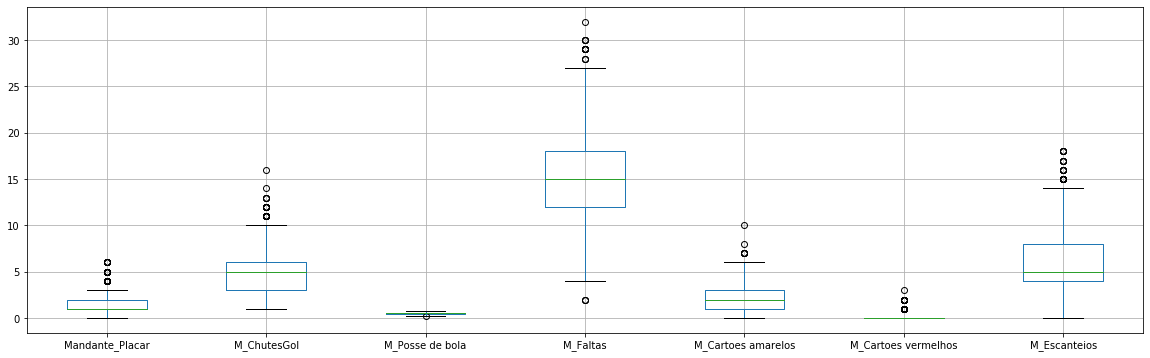

In [24]:
plt.figure(figsize =(20, 6))
Atributos.boxplot(column=['Mandante_Placar', 'M_ChutesGol', 'M_Posse de bola', 'M_Faltas', 'M_Cartoes amarelos', 'M_Cartoes vermelhos', 'M_Escanteios'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

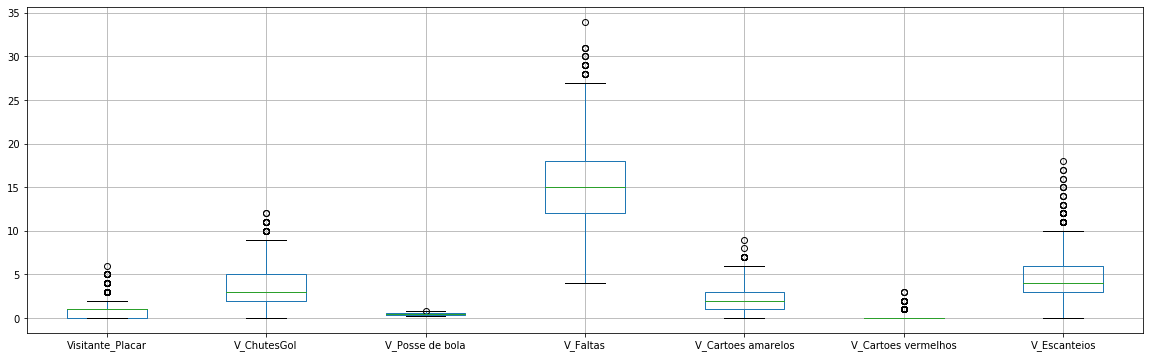

In [25]:
plt.figure(figsize =(20, 6))
Atributos.boxplot(column=['Visitante_Placar', 'V_ChutesGol', 'V_Posse de bola', 'V_Faltas', 'V_Cartoes amarelos', 'V_Cartoes vermelhos', 'V_Escanteios'])
plt.show

In [26]:
M_Gols_Clubes = Dados.groupby('Mandante')['Mandante_Placar'].sum()
V_Gols_Clubes = Dados.groupby('Visitante')['Visitante_Placar'].sum()
print('Média de Gols dos Mandantes: ' + str((M_Gols_Clubes).mean()))
print('Média de Gols dos Visitantes: ' + str((V_Gols_Clubes).mean()))

Média de Gols dos Mandantes: 101.27272727272727
Média de Gols dos Visitantes: 67.93939393939394


In [27]:
Best_M_Gols_Clubes = M_Gols_Clubes.loc[M_Gols_Clubes>2*(M_Gols_Clubes).mean()]
print(Best_M_Gols_Clubes)

Mandante
ATLÉTICO-MG    204.0
FLAMENGO       220.0
PALMEIRAS      230.0
SANTOS         219.0
Name: Mandante_Placar, dtype: float64


In [28]:
Best_V_Gols_Clubes = V_Gols_Clubes.loc[V_Gols_Clubes>2*(V_Gols_Clubes).mean()]
print(Best_V_Gols_Clubes)

Visitante
ATLÉTICO-MG    147.0
FLAMENGO       153.0
PALMEIRAS      148.0
Name: Visitante_Placar, dtype: float64


In [29]:
Best_Gols_Clubes = Best_M_Gols_Clubes + Best_V_Gols_Clubes
print(Best_Gols_Clubes)

ATLÉTICO-MG    351.0
FLAMENGO       373.0
PALMEIRAS      378.0
SANTOS           NaN
dtype: float64


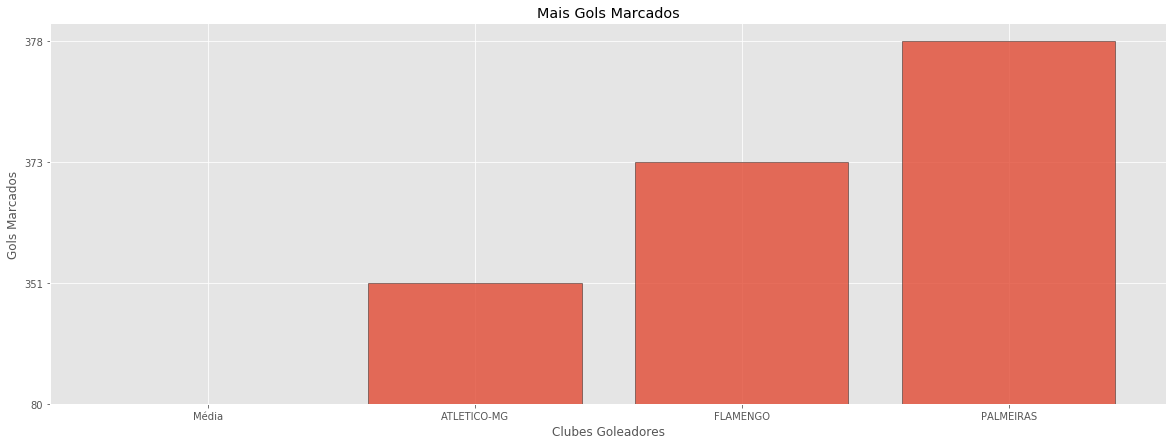

In [30]:
Best_Clubes = ['Média','ATLETICO-MG', 'FLAMENGO', 'PALMEIRAS']
Num_Gols = ['80','351','373', '378']
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
plt.bar(Best_Clubes, Num_Gols, ec = "k", alpha = .8)
plt.title("Mais Gols Marcados")
plt.xlabel("Clubes Goleadores")
plt.ylabel("Gols Marcados")
plt.show()

In [31]:
MelhoresAtributos = Atributos.drop(['M_Chutes', 'V_Chutes', 'V_Impedimentos', 'M_Impedimentos'], axis =1)

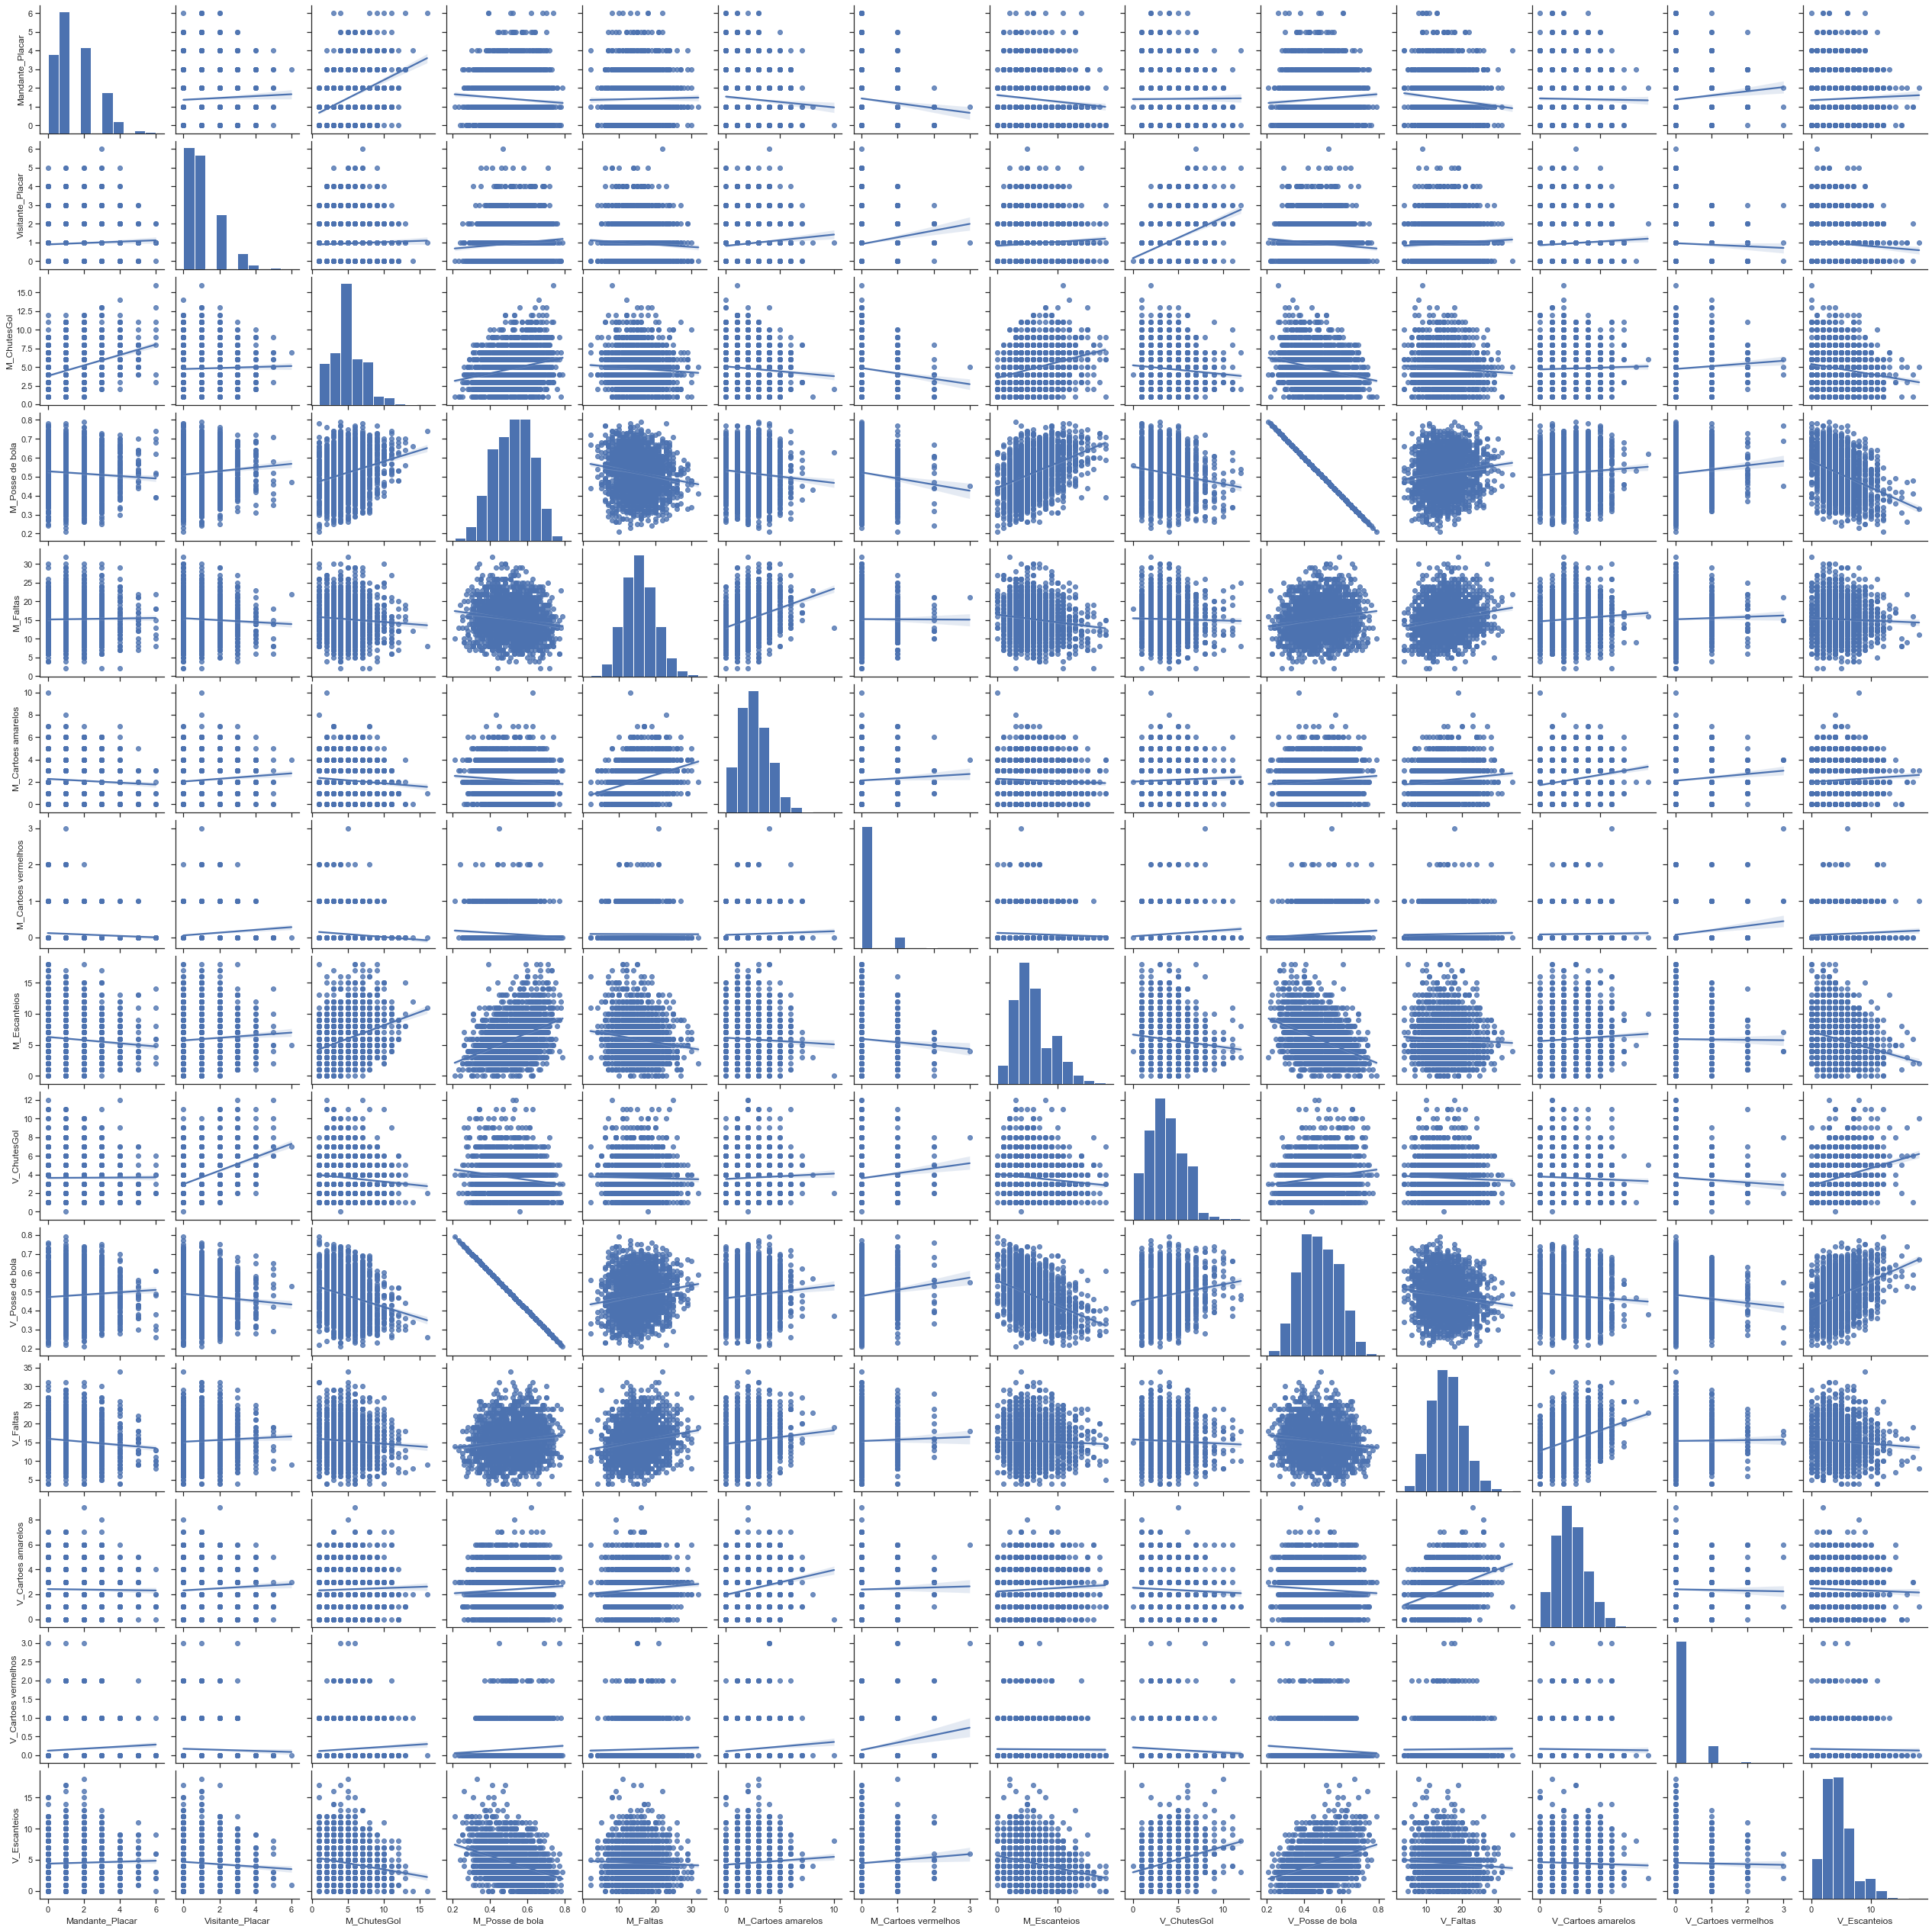

In [32]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(MelhoresAtributos, kind='reg')
plt.show()

In [33]:
scaler = MinMaxScaler().fit(MelhoresAtributos)
MelhoresAtributos = scaler.transform(MelhoresAtributos)

print ('MelhoresAtributos: ',MelhoresAtributos.shape)
print(MelhoresAtributos)

MelhoresAtributos:  (2367, 14)
[[0.33333333 0.33333333 0.33333333 ... 0.44444444 0.         0.11111111]
 [0.33333333 0.16666667 0.2        ... 0.22222222 0.         0.27777778]
 [0.16666667 0.         0.66666667 ... 0.         0.33333333 0.16666667]
 ...
 [0.16666667 0.         0.26666667 ... 0.44444444 0.33333333 0.27777778]
 [0.33333333 0.33333333 0.26666667 ... 0.66666667 0.         0.22222222]
 [0.         0.16666667 0.13333333 ... 0.33333333 0.         0.22222222]]


# Models

In [34]:
xTrain, xTest, yTrain, yTest = train_test_split(MelhoresAtributos[:2170], Result[:2170], random_state=42, test_size=0.2)

In [35]:
print (len(xTrain), len(yTrain))
print (len(xTest), len(yTest))

1736 1736
434 434


In [36]:
print('Classificador A: Logist Regression ')
start = time.time()
classif_A = LogisticRegression(multi_class='multinomial',max_iter=2000)
classif_A.fit(xTrain, yTrain)
predicA = classif_A.predict(xTest)

lg_acc = accuracy_score(yTest, predicA)
f1=f1_score(yTest,predicA,average = 'micro')
Scores = cross_val_score(classif_A, MelhoresAtributos, Result, cv=5, scoring='accuracy')
end = time.time()
print ('Acurácia:{}'.format(lg_acc))
print ('Scores Cross-Validation:{}'.format(Scores.mean()))
print ('F1 Score:{}'.format(f1) )
print ('Modelo treinado em {:.4f} segundo'.format(end - start))

Classificador A: Logist Regression 
Acurácia:1.0
Scores Cross-Validation:0.9970410611858949
F1 Score:1.0
Modelo treinado em 0.5277 segundo


In [37]:
print('Classificador B: Support Vector Machine ')
start = time.time()
classif_B = SVC()
classif_B.fit(xTrain, yTrain)
predicB= classif_B.predict(xTest)

svc_acc = accuracy_score(yTest, predicB)
f1=f1_score(yTest,predicB, average='micro')
Scores = cross_val_score(classif_B, MelhoresAtributos, Result, cv=5, scoring='accuracy')
end = time.time()
print ('Acurácia:{}'.format(svc_acc))
print ('Scores Cross-Validation:{}'.format(Scores.mean()))
print ('F1 Score:{}'.format(f1) )
print ('Modelo treinado em {:.4f} segundo'.format(end - start))

Classificador B: Support Vector Machine 
Acurácia:0.9976958525345622
Scores Cross-Validation:0.9991552260907575
F1 Score:0.9976958525345622
Modelo treinado em 0.6556 segundo


In [38]:
print('Classificador C: Naive Baeys ')
start = time.time()
classif_C = GaussianNB()
classif_C.fit(xTrain, yTrain)
predicC= classif_C.predict(xTest)

nb_acc = accuracy_score(yTest, predicC)
f1=f1_score(yTest,predicC, average='micro')
Scores = cross_val_score(classif_C, MelhoresAtributos, Result, cv=5, scoring='accuracy')
end = time.time()
print ('Acurácia:{}'.format(svc_acc))
print ('Scores Cross-Validation:{}'.format(Scores.mean()))
print ('F1 Score:{}'.format(f1) )
print ('Modelo treinado em {:.4f} segundo'.format(end - start))

Classificador C: Naive Baeys 
Acurácia:0.9976958525345622
Scores Cross-Validation:0.7583366785309676
F1 Score:0.7534562211981567
Modelo treinado em 0.0340 segundo


# Validation

In [39]:
Validation = MelhoresAtributos[2170:]
ID_Partida = Dados['ID']
ID_Partida = ID_Partida[2170:]
Resultado = Dados['Vencedor']
Resultado = Resultado[2170:]

pred = classif_A.predict(Validation)
df_Valid=pd.DataFrame({'ID':ID_Partida, 'Resultado': Resultado, 'Previsão':pred})
df_Valid.head()

,ID,Resultado,Previsão
2205,8246,1,1
2206,8247,1,1
2207,8248,0,0
2208,8249,1,1
2209,8250,2,2


In [40]:
df_Valid.shape

(197, 3)

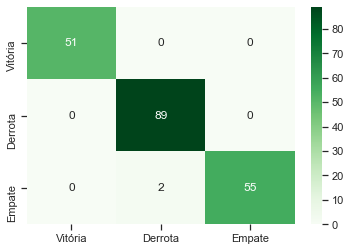

In [41]:
cm = confusion_matrix(Resultado, pred)

df_cm = pd.DataFrame(cm, index=['Vitória','Derrota', 'Empate'],
                    columns=['Vitória','Derrota', 'Empate'])

sns.heatmap(df_cm, annot=True, cmap='Greens')
plt.show()

Apesar do algoritimo não saber o que representa na prática o Placar do Mandante e do Visitante, ficou evidente a facilidade 
em acertar o resultado mediante estes dois atributos. Abaixo um novo teste sem essas duas colunas:


In [43]:
MelhoresAtributos_semgols = Atributos.drop(['M_Chutes', 'V_Chutes', 'V_Impedimentos', 'M_Impedimentos', 'Mandante_Placar', 'Visitante_Placar'], axis =1)

In [45]:
scaler = MinMaxScaler().fit(MelhoresAtributos_semgols)
MelhoresAtributos_semgols = scaler.transform(MelhoresAtributos_semgols)

In [46]:
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(MelhoresAtributos_semgols[:2170], Result[:2170], random_state=42, test_size=0.2)

In [55]:
print('Classificador A2: Logist Regression ')
start = time.time()
classif_A2 = LogisticRegression(multi_class='multinomial',max_iter=2000)
classif_A2.fit(xTrain2, yTrain2)
predicA2 = classif_A2.predict(xTest2)
lg_acc = accuracy_score(yTest2, predicA2)
f1=f1_score(yTest2,predicA2,average = 'micro')
Scores = cross_val_score(classif_A2, MelhoresAtributos_semgols, Result, cv=5, scoring='accuracy')
end = time.time()
print ('Acurácia:{}'.format(lg_acc))
print ('Scores Cross-Validation:{}'.format(Scores.mean()))
print ('F1 Score:{}'.format(f1) )
print ('Modelo treinado em {:.4f} segundo'.format(end - start))

Classificador A2: Logist Regression 
Acurácia:0.5529953917050692
Scores Cross-Validation:0.5636122782133969
F1 Score:0.5529953917050692
Modelo treinado em 0.5761 segundo


In [51]:
print('Classificador B2: Support Vector Machine ')
start = time.time()
classif_B2 = SVC()
classif_B2.fit(xTrain2, yTrain2)
predicB2= classif_B2.predict(xTest2)
svc_acc = accuracy_score(yTest2, predicB2)
f1=f1_score(yTest2,predicB2, average='micro')
Scores = cross_val_score(classif_B2, MelhoresAtributos_semgols, Result, cv=5, scoring='accuracy')
end = time.time()
print ('Acurácia:{}'.format(svc_acc))
print ('Scores Cross-Validation:{}'.format(Scores.mean()))
print ('F1 Score:{}'.format(f1) )
print ('Modelo treinado em {:.4f} segundo'.format(end - start))

Classificador B2: Support Vector Machine 
Acurácia:0.532258064516129
Scores Cross-Validation:0.5669806692179373
F1 Score:0.532258064516129
Modelo treinado em 1.2065 segundo


In [56]:
print('Classificador C2: Naive Baeys ')
start = time.time()
classif_C2 = GaussianNB()
classif_C2.fit(xTrain2, yTrain2)
predicC2= classif_C2.predict(xTest2)
nb_acc = accuracy_score(yTest2, predicC2)
f1=f1_score(yTest2,predicC2, average='micro')
Scores = cross_val_score(classif_C2, MelhoresAtributos_semgols, Result, cv=5, scoring='accuracy')
end = time.time()
print ('Acurácia:{}'.format(svc_acc))
print ('Scores Cross-Validation:{}'.format(Scores.mean()))
print ('F1 Score:{}'.format(f1) )
print ('Modelo treinado em {:.4f} segundo'.format(end - start))

Classificador C2: Naive Baeys 
Acurácia:0.532258064516129
Scores Cross-Validation:0.5416213949920161
F1 Score:0.5299539170506913
Modelo treinado em 0.0320 segundo


In [61]:
Validation2 = MelhoresAtributos_semgols[2170:]
ID_Partida = Dados['ID']
ID_Partida = ID_Partida[2170:]
Resultado = Dados['Vencedor']
Resultado = Resultado[2170:]

pred2 = classif_A2.predict(Validation2)
df_Valid2=pd.DataFrame({'ID':ID_Partida, 'Resultado': Resultado, 'Previsão':pred2})
df_Valid2.head()

,ID,Resultado,Previsão
2205,8246,1,1
2206,8247,1,1
2207,8248,0,0
2208,8249,1,1
2209,8250,2,1


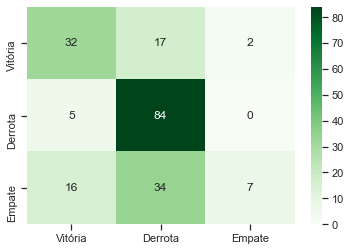

In [59]:
cm = confusion_matrix(Resultado, pred2)

df_cm = pd.DataFrame(cm, index=['Vitória','Derrota', 'Empate'],
                    columns=['Vitória','Derrota', 'Empate'])

sns.heatmap(df_cm, annot=True, cmap='Greens')
plt.show()